# Machine Learning - 03 Decision Tree

In [1]:
from IPython.display import Image

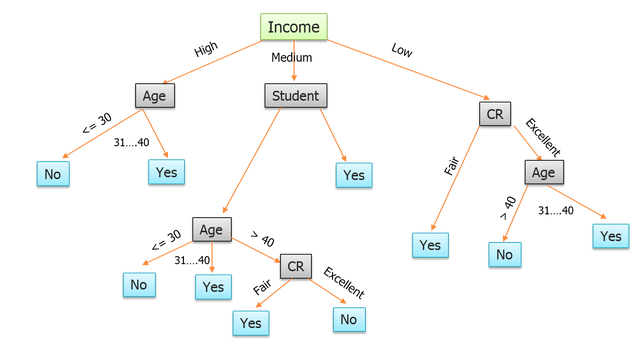

In [5]:
no = "045"
w = 500
img_path1 = "data/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

### 특징  
* 설명하기가 아주 편하고 직관적임!  
* 크기가 커지면 오버비팅이 심할 수 있음 
* 실질적으로 성능이 아주 좋지가 않아서, 일반적으로 잘 사용은 하지 않음  
* 다만, 요즘 단순 Decision Tree를 사용하지 않고, Random Forest나 다른 방식의 Tree를 많이 사용한다.  
* 예전에는 일단  Random Forest 에 넣어서 확인을 하고 사용했다면, 요즘은 Random Forest나 Xgboost 를 Random Forest 대용을 더 많이 사용하고 있다.

## 참고 : Scikit-Learn의 preprocessing  관련 사항  
* 스케일링[scaling] : 자료 크기 조정  
(목적 : overflow, underflow 를 방지하고, 독립변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴속도 향상)
scale - StandardScaler[표준정상분포 Standard Normal Gaussian 기본 스케일]  
normalize - Normalizer  
minmax_scale - MinMaxScaler[최대/최소값 사용]  
maxabs_scale - MaxAbsScaler[최대절대값 사용]  
robust_scale - RobustScaler[median, interquartile range 사용. outlier 영향 최소화]  

* 인코딩[Encoding]: 카테고리 값의 정수 표현  
(인코딩 : 카테고리 값이나 텍스트 정보를 처리할 수 있는 정수로 변환하는 프로세스)  
binarize - Binarizer[th 값을 기준으로 0/1로 처리하는 것]  
label_binarize - LabelBinarizer[onehot과 유사하지만, 사용되는 카테고리만 사용하여 컬럼으로 ]  
LabelEncoder[k 개의 종류가 있다면 0~k-1까지의 정수로 단순히 변경해서 수행]  
OneHotEncoder[k개의 값을 가지는 스칼라 값을 0또는 1의 값을 가지는 k차원의 벡터로 변환]  
DictVectorizer[주로 텍스트에서 원드별로 카운트와 관련된 것 처리할 때]  

* Imputation: 결손 데이터(missing data) 처리  
Imputer

* Transform: 데이터 변환 
PolynomialFeatures[x를 1, x, x^2, x^3 ..등으로 표현하는 것]  
FunctionTransformer[Transform으로 f함수 통해서 변형]


* 참고 : One-Hot-Encoder[번주형 변수 처리하는데 많이 사용되는 방법 중 하나]  
범주형 변수로 성별으로 남/여 처럼 되어 있으면 2가지로 코딩이 되는데, 이 보다 많은 종류를 가지게 되는 경우에는 어떻게 할것인가 문제가 된다.  
등급을 10등급으로 한다고 하면, 실제 트리상에서는 2^10으로 1024가지의 경우를 판단해야 한다.  
그래서 거의 32개로 되어 있으면, 그 양만해도 2^32으로 심각하게 오버로딩이 많이 걸리게 된다. 
그래서 거의 dummy variable encoding 방식이라고 이해하면 됨.  
아래 그림을 보면 제일 확실히 이해가 됨!  

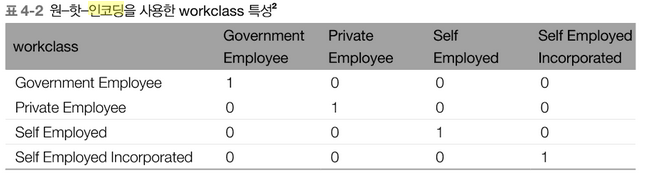

In [6]:
no = "046"
w = 500
img_path1 = "data/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)
# ref : 파이썬 라이브러리를 활용한 머신러닝: 사이킷런 핵심 개발자가 쓴 머신러닝과 데이터~~

## Regression Tree

*  data : Hitters.csv[야구 선수 급여]

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics  

%matplotlib inline


In [8]:
# Hitters.csv파일 불러오기
path = "data/Hitters.csv"
hitters = pd.read_csv(path)
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [9]:
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [11]:
len(hitters.columns)

21

* 관찰 데이터 : 322  
* 컬럼 : 21개[ Unnamed: 0 , League, Division, NewLeague 은 숫자형 데이터가 아님 ]  
* 결과 변수 :  'Salary'는 263개 but 전체 322개 데이터 중에서 실제 salary 데이터가 263개만 있음;;;;;;

### 데이터 처리  
* salary 의 값이 없는 observation 제거  
* Unnamed:0 컬럼이름 변경 & - 제거  
* 결과 변수 salary의 log변환

In [12]:
hitters.dropna(inplace=True) # 셀러리값이 있는 행만 남김
hitters.shape

(263, 21)

In [13]:
hitters.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [14]:
# 컬럼 이름 변경 -> rename, 무엇을 무엇으로 바꿀까 -> 연결, 맵핑
# 파이썬의 dict타입을 사용해서 구현
# 에러가 나지 않기 때문에 꼭 직접 확인해야 함. 
hitters.rename(columns={"Unnamed: 0" : "Name"}, inplace=True)
hitters.columns

Index(['Name', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [16]:
hitters.Name

1            -Alan Ashby
2           -Alvin Davis
3          -Andre Dawson
4      -Andres Galarraga
5       -Alfredo Griffin
             ...        
317        -Willie McGee
318     -Willie Randolph
319      -Wayne Tolleson
320       -Willie Upshaw
321       -Willie Wilson
Name: Name, Length: 263, dtype: object

In [18]:
# Name 앞에 - 지우기
hitters['Name'] = hitters['Name'].apply(lambda x : x.replace("-",""))
hitters['Name']

1            Alan Ashby
2           Alvin Davis
3          Andre Dawson
4      Andres Galarraga
5       Alfredo Griffin
             ...       
317        Willie McGee
318     Willie Randolph
319      Wayne Tolleson
320       Willie Upshaw
321       Willie Wilson
Name: Name, Length: 263, dtype: object

<AxesSubplot:>

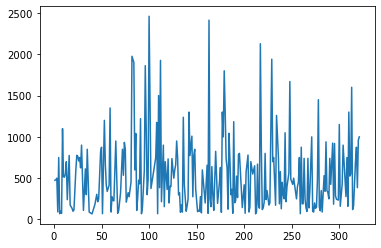

In [19]:
hitters['Salary'].plot()

<AxesSubplot:ylabel='Frequency'>

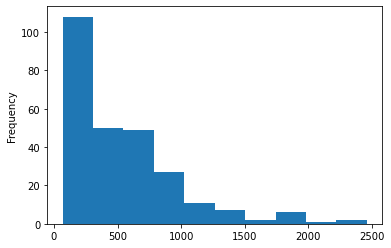

In [20]:
hitters['Salary'].plot(kind='hist')

In [21]:
# log변환 - 원활한 분석을 위해. (정규분포 그래프가 아니라서 분석 어려움. 쉽게 하기 위해 조작)
hitters['Salary'] = np.log(hitters['Salary'])
hitters['Salary']

1      6.163315
2      6.173786
3      6.214608
4      4.516339
5      6.620073
         ...   
317    6.551080
318    6.774224
319    5.953243
320    6.866933
321    6.907755
Name: Salary, Length: 263, dtype: float64

<AxesSubplot:>

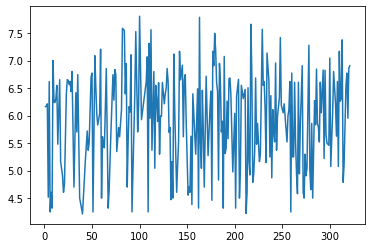

In [23]:
hitters['Salary'].plot()

<AxesSubplot:ylabel='Frequency'>

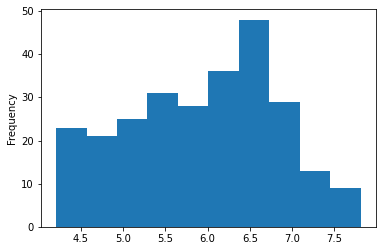

In [25]:
hitters['Salary'].plot(kind='hist')

In [27]:
# reindex -> 셀러리 비어있는 행 삭제해서 빈 인덱스 존재. 0부터 다시 채움
hitters.reset_index(drop=True,inplace=True)
print(hitters.index)
hitters.head()

RangeIndex(start=0, stop=263, step=1)


,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,6.163315,N
1,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,6.173786,A
2,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,6.214608,N
3,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,4.516339,N
4,Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,6.620073,A


In [29]:
# 전체 모든 특징을 다 고려하지 않음.
# 선수 경력, 안타수, 연봉의 관계를 보려 함. 
X = hitters.loc[:,['Years','Hits']]
y = hitters['Salary']

In [30]:
# DT에 대한 모델 준비
reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=3)
# 학습
reg_tree.fit(X,y)


DecisionTreeRegressor(max_leaf_nodes=3)

* 원래 pydotplus를 이용해서 보여주는데, 지금 해당 패키지가 유지보수중이라서 다른 형식으로 처리함.

Text(13, 180, 'R3')

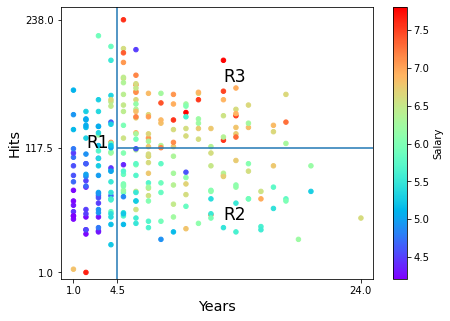

In [31]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))          

hitters.plot('Years','Hits', kind='scatter',c = 'Salary',
             ax=ax1, xticks=[1, 4.5, 24], yticks=[1, 117.5, 238], 
             xlim=[0, 25], ylim=[-5, 250], cmap='rainbow') 

plt.xlabel('Years', fontsize='x-large')
plt.ylabel('Hits', fontsize='x-large')
plt.vlines(4.5,  ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize=17)
plt.annotate('R2', xy=(13,50), fontsize=17)
plt.annotate('R3', xy=(13,180), fontsize=17)

In [32]:
reg_tree.tree_.threshold # year는4.5기준 , hits는 117.5 가 적당함. 

array([  4.5,  -2. , 117.5,  -2. ,  -2. ])

? 아래는 윈도우에서 아래 pydotplus의 기능이 graphviz 로 인해서 안 될 경우.
먼저 구글의 graphviz 에 가서 윈도우 용으로 설치를 한 이후에...       
1) anaconda navigator에서 pydotplus 설치   
2) graphviz 윈도우에 설치    
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


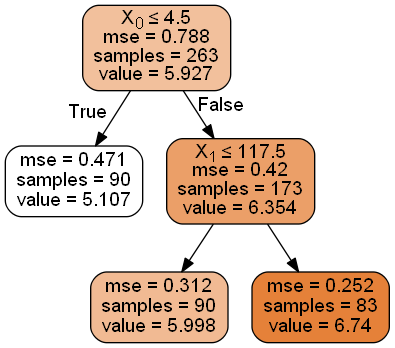

In [35]:
from six import StringIO

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

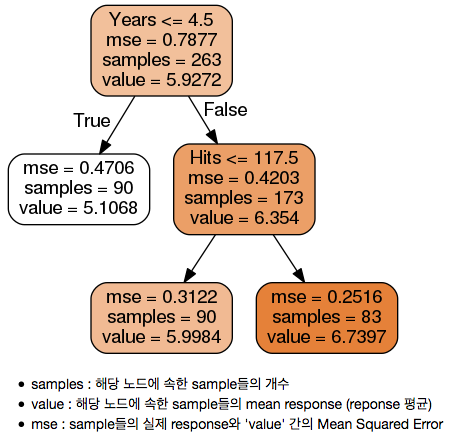

In [36]:
no = "047"
w = 500
img_path1 = "data/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

* Full 로 한 번 던져보기!

In [38]:
# 기계적으로 모델이 돌아갈 수 있게 널값 제거, 숫자로 다 변환.

pd.get_dummies
hitters_enc = pd.get_dummies(hitters.drop("Name", axis=1),drop_first=True)
X = hitters_enc.drop("Salary", axis=1)
y = hitters_enc["Salary"]


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AtBat        263 non-null    int64
 1   Hits         263 non-null    int64
 2   HmRun        263 non-null    int64
 3   Runs         263 non-null    int64
 4   RBI          263 non-null    int64
 5   Walks        263 non-null    int64
 6   Years        263 non-null    int64
 7   CAtBat       263 non-null    int64
 8   CHits        263 non-null    int64
 9   CHmRun       263 non-null    int64
 10  CRuns        263 non-null    int64
 11  CRBI         263 non-null    int64
 12  CWalks       263 non-null    int64
 13  PutOuts      263 non-null    int64
 14  Assists      263 non-null    int64
 15  Errors       263 non-null    int64
 16  League_N     263 non-null    uint8
 17  Division_W   263 non-null    uint8
 18  NewLeague_N  263 non-null    uint8
dtypes: int64(16), uint8(3)
memory usage: 33.8 KB


In [42]:
reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=12)
reg_tree.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=12)

In [43]:
reg_tree.tree_.threshold # 컬럼별로 기준값이 뭔지. year은 4.5가 기준으로 적당했음

array([1452. ,  182. ,  117.5,   73. ,  465. ,   -2. ,  132. ,  996. ,
        273. ,  821. ,   60.5,   -2. ,   -2. ,   -2. ,   -2. ,   21. ,
         -2. ,   -2. ,   -2. ,   -2. ,   -2. ,   -2. ,   -2. ])

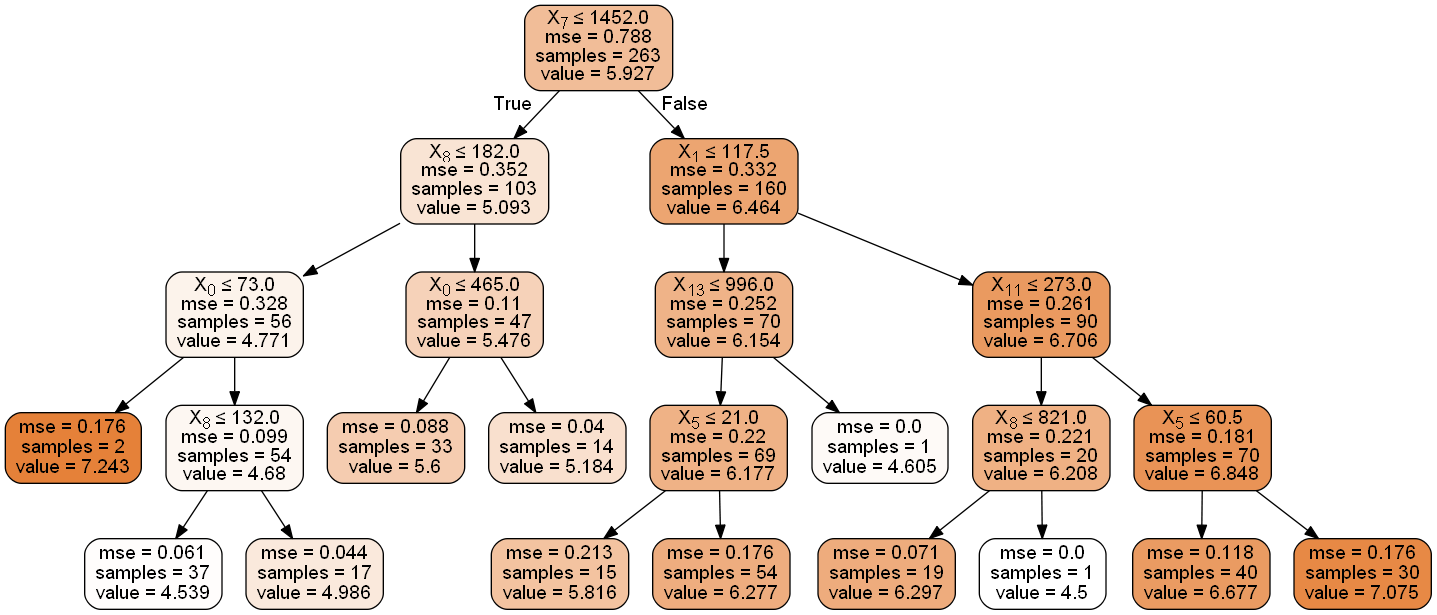

In [44]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

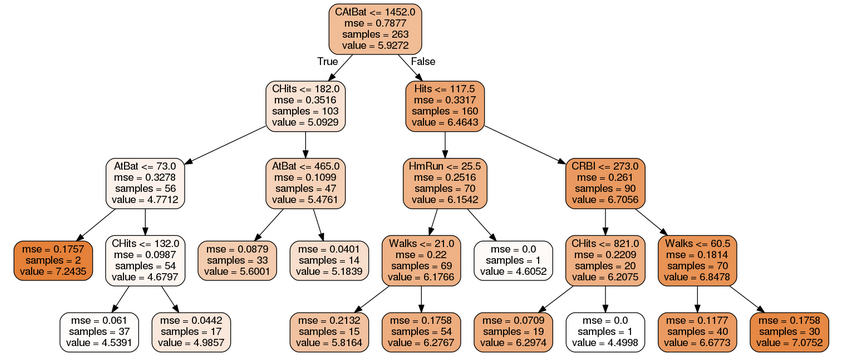

In [45]:
no = "048"
w = 500
img_path1 = "data/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

* 그럼 어느 단계까지 해야 좋은가? --> 파라미터 튜닝!

In [46]:
from sklearn.model_selection import cross_val_score

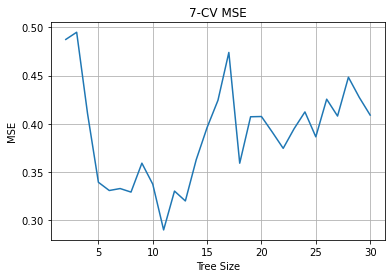

In [47]:
tree_sizes = range(2, 31)
MSE_scores = []
# 7 으로..7-fold
for size in tree_sizes:
    reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=size)
    MSE_s = 1 - cross_val_score(reg_tree, X, y, cv=3)
    MSE_scores.append(MSE_s.mean())

# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)


* 9개로 하면 제일 좋은 성능이 나오네~~

In [48]:
reg_tree_best = tree.DecisionTreeRegressor(max_leaf_nodes=9)
reg_tree_best.fit(X,y)


DecisionTreeRegressor(max_leaf_nodes=9)

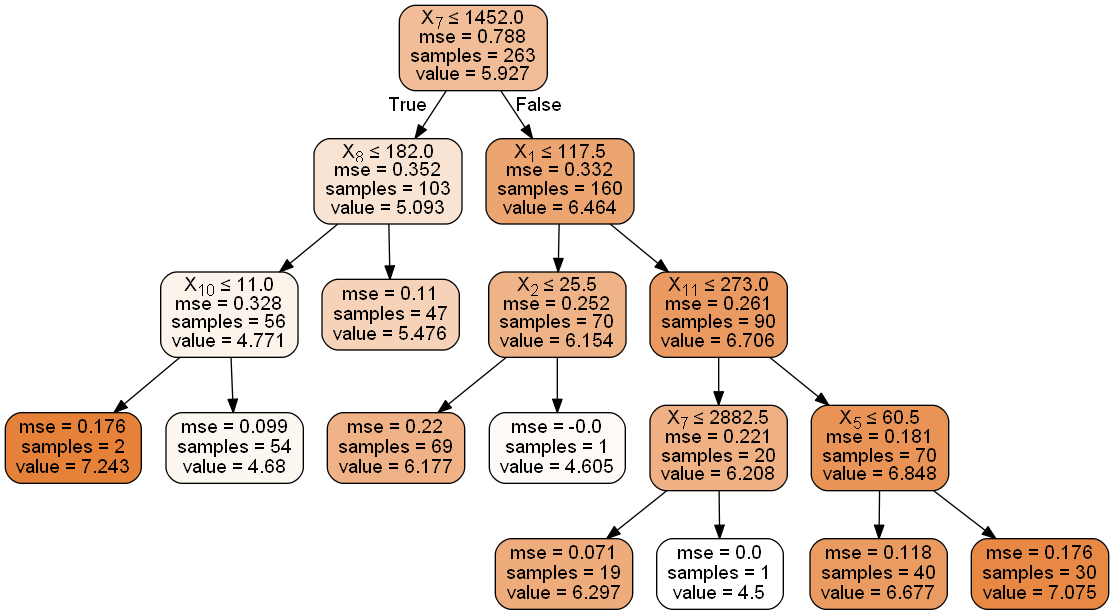

In [49]:
from six import StringIO

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg_tree_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

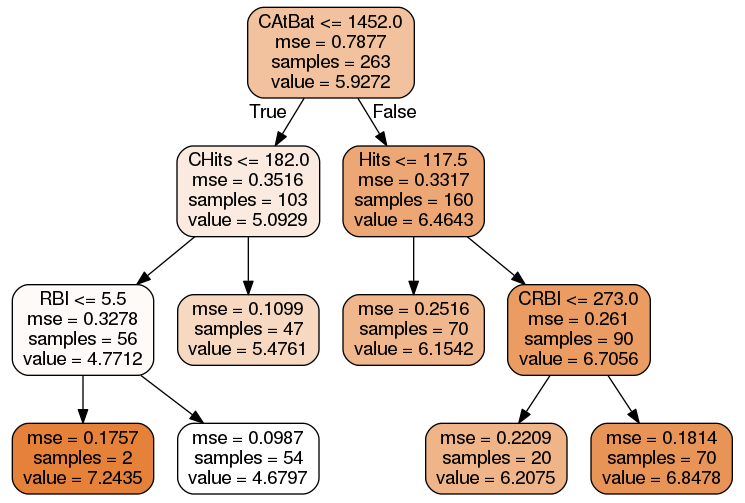

In [50]:
no = "049"
w = 800
img_path1 = "data/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

* 트리 기반의 모형에서 변수의 중요도를 보고, 시각화 하는 부분은 계속 반복되고, 실질적으로 트리베이스 모델이 가진 장점중에 하나다. 추후에 모델을 개선하는데에 어느 변수가 중요하고, 어느 변수를 중점적으로 관찰하는게 좋을지 후보군을 생각할 수 있기 때문이다. 

In [54]:
# reg_tree_best 이 모델이 제일 좋은 모델이라고 가정했을 때.
reg_tree_best.feature_importances_  # 여기서 0이 나오는 모델은 차원축소로 없애도 되는 것. 

array([0.        , 0.07049821, 0.01433617, 0.        , 0.        ,
       0.01597834, 0.        , 0.71219564, 0.07477229, 0.        ,
       0.07465956, 0.03755978, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [56]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [59]:
# 위의 모델에서 중요한 변수들이 무엇이고, 그 순서는?
feature_importance = pd.DataFrame({
    "feature" : X.columns,
    "importance": reg_tree_best.feature_importances_}).sort_values(by="importance",ascending=False)
feature_importance

,feature,importance
7,CAtBat,0.712196
8,CHits,0.074772
10,CRuns,0.074660
1,Hits,0.070498
11,CRBI,0.037560
5,Walks,0.015978
2,HmRun,0.014336
0,AtBat,0.000000
13,PutOuts,0.000000
17,Division_W,0.000000


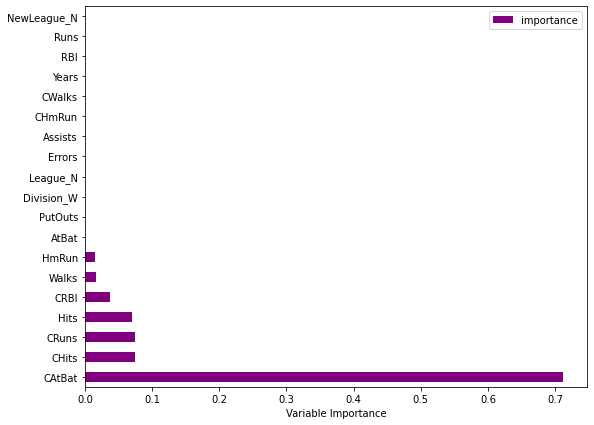

In [61]:
# 위의 변수 중요도(의사결정나무 입장에서 주어진 max_leaf_nodes=9)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,7))
feature_importance.plot(kind="barh", color="purple", ax = ax)
y_pos = np.arange(len(feature_importance))
plt.xlabel("Variable Importance")
plt.yticks(y_pos, feature_importance.feature)
plt.show()


* scikit-learn은 Pruning을 제공하지 않음. 
* 그러나, 위에서 보았듯이 'terminal node의 수'에 따른 Cross-Validation과 같은 방법을 이용하여 Pruning과 비슷한 효과를 볼 수 있음.
* 그러나 Random Forest와 Boosting은 Pruning을 사용한 어떤 단일 tree보다 나은 거 같아서인지 업데이트를 잘 안함;;



## 테스트  : carseat

(400, 12)


,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


### Step 1  
* Sales의 값이 8이하 -0, 8초과 1로 설정  
* Urban에서 N0-0, Yes-1  
* US에서 No-0, Yes-1  
* 15개 잎

DecisionTreeClassifier(max_leaf_nodes=15)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [31]:
clf_tree.tree_.threshold

array([ 92.5,   0.5,   6.5, 144.5,   0.5,  -2. ,   1.5, 163.5, 124.5,
       121.5,  22. , 103.5,  -2. ,  -2. , 151.5,  58. ,  -2. ,  -2. ,
        -2. ,   0.5,  -2. ,  -2. ,  -2. ,  -2. ,  -2. ,  -2. ,  -2. ,
        -2. ,  -2. ])

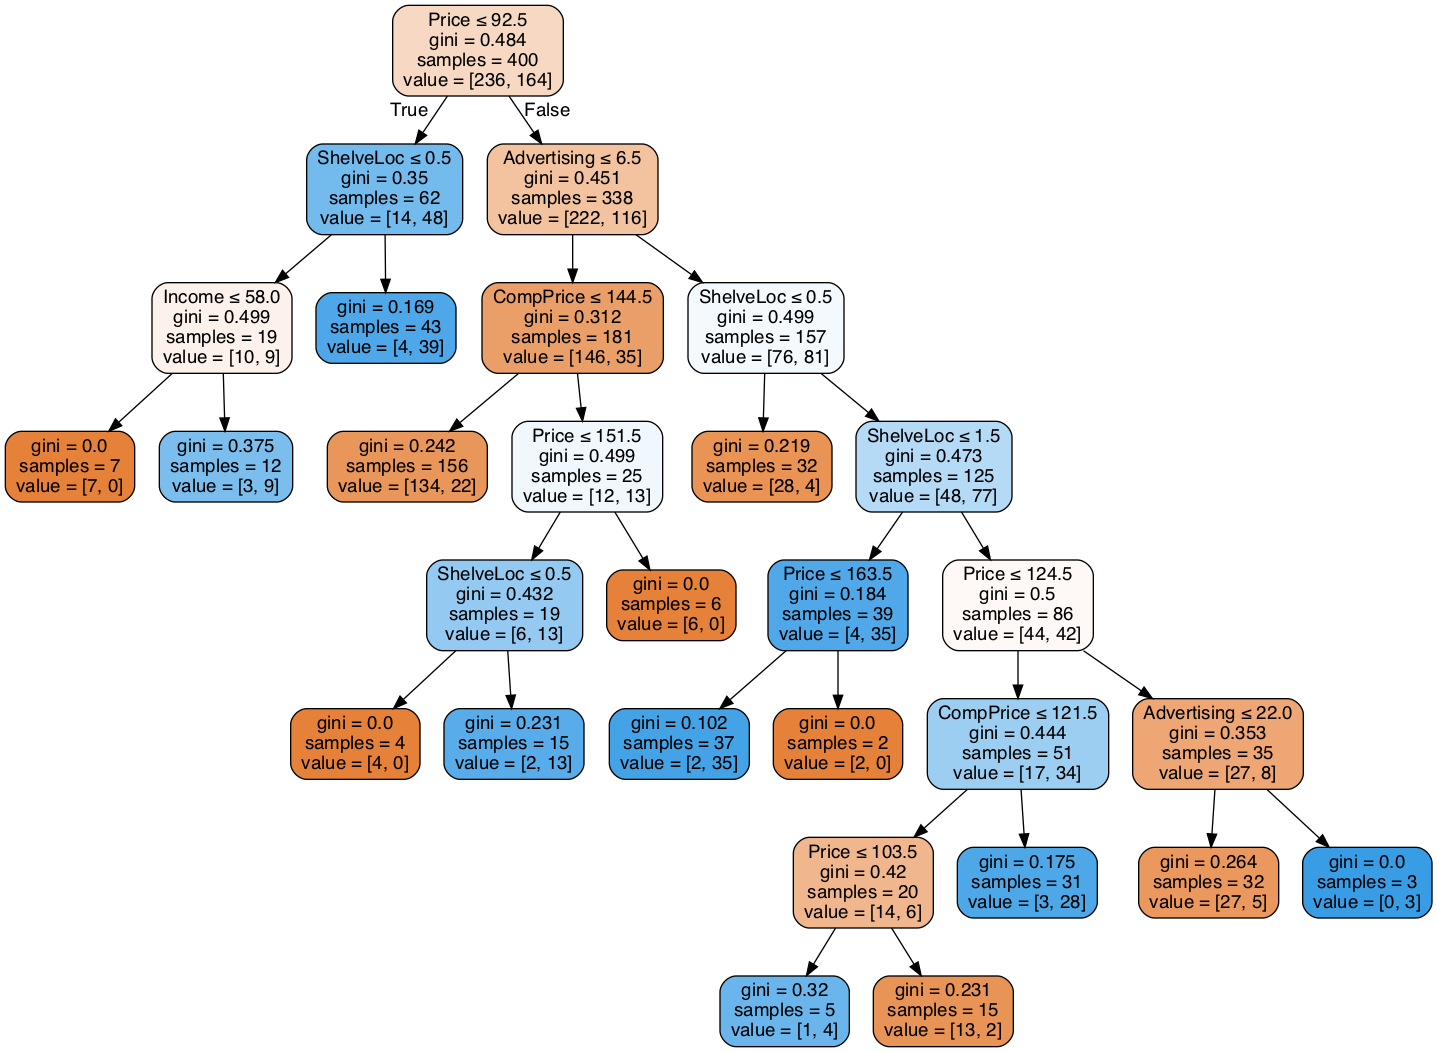

In [82]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X.columns)
# 아까처럼 컬럼 순서가 아니라 직접 컬럼 이름을 보기 위해서는....위의 feature_names를 사용
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

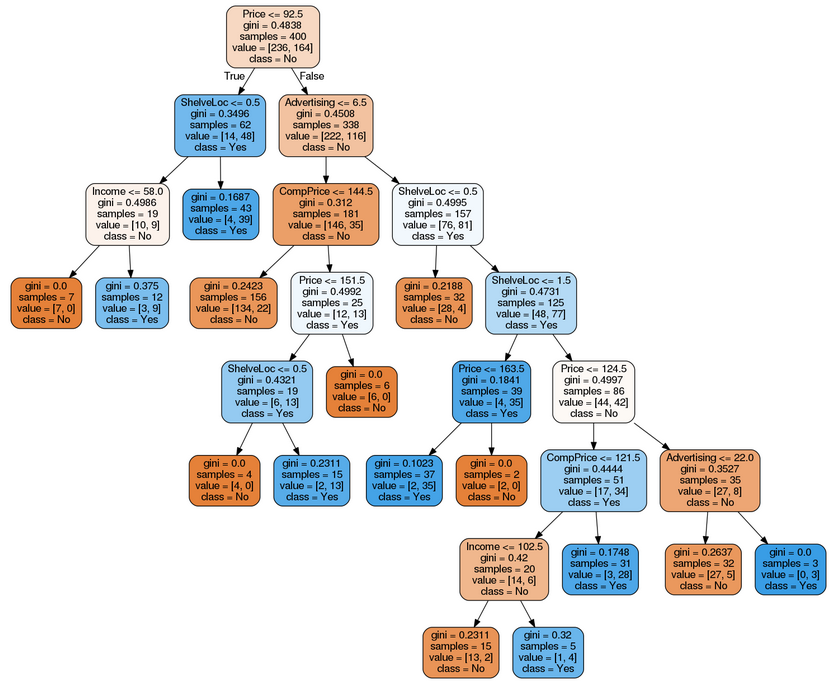

In [92]:
no = "050"
w = 800
img_path1 = "ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

### Step2  
* 이 데이터를 가지고 Train/Test로 나누어서 해보자.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

0.775

###  Step3  
* 최적의 잎 갯수 찾기 : cv이용해서~

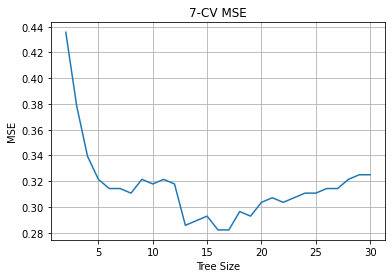

In [34]:
tree_sizes = range(~)

~

# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

* 약 17개의 정도에서 최적화가 되는 듯..

0.7666666666666667

,feature,importance
4,Price,0.264659
5,ShelveLoc,0.230507
2,Advertising,0.166148
6,Age,0.162689
0,CompPrice,0.127869
1,Income,0.048128
3,Population,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


### Step4  
* one-hot-encoding 적용

(400, 12)


,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [38]:
# 1컬럼은 필요가 없어서 제거


(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


0.7916666666666666

In [40]:
Carseats_enc.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,0,1,1
2,10.06,113,35,10,269,80,59,12,1,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1,0


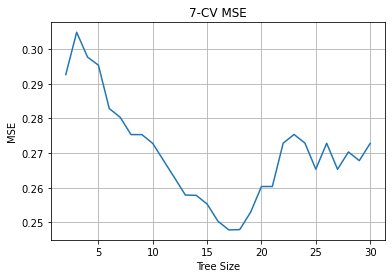

In [41]:
tree_sizes = range(~~)
~~

# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

0.775


* 어찌되었든, one-hot-encoding으로 한 결과가 거의 비슷;;;

# Random Forest

* feature 수(max_features), minimum sample 개수(min_samples_split), maximum depth(max_depth) 등을 cross-validation 통해 결정할 수 있다.
* 중요한 parameter는 'n_estimators'와 'max_features'. n_estimator는 클수록 좋지만 대개 300 에서 시작해 성능을 보아가며 조정

0.8916666666666667


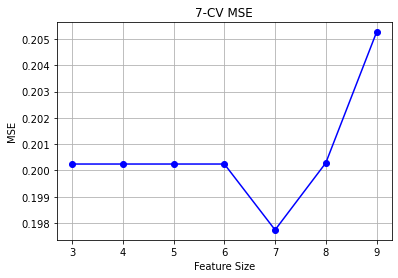

* 7일때 제일 좋고, MSE=0.197정도..

0.8666666666666667


,feature,importance
4,Price,0.218094
5,Age,0.133567
2,Advertising,0.130990
0,CompPrice,0.124573
7,ShelveLoc_Good,0.110086
1,Income,0.099856
3,Population,0.072662
6,Education,0.044977
8,ShelveLoc_Medium,0.039403
10,US_Yes,0.014615


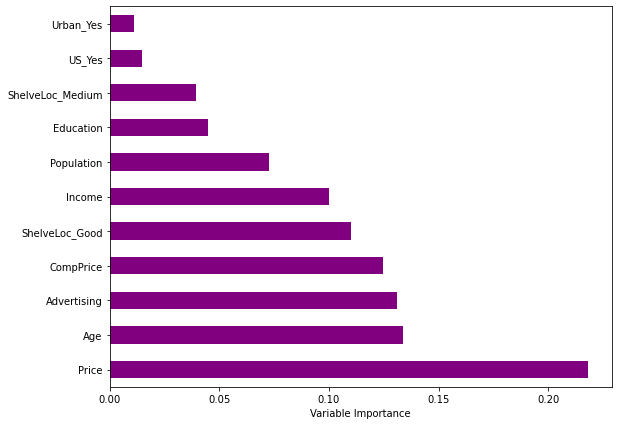